Selection des données

In [36]:
import pandas as pd

df1 = pd.read_csv('datasets/fire_archive.csv', header=0)
df2 = pd.read_csv('datasets/weatherAUS.csv', header=0, usecols=['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall'])


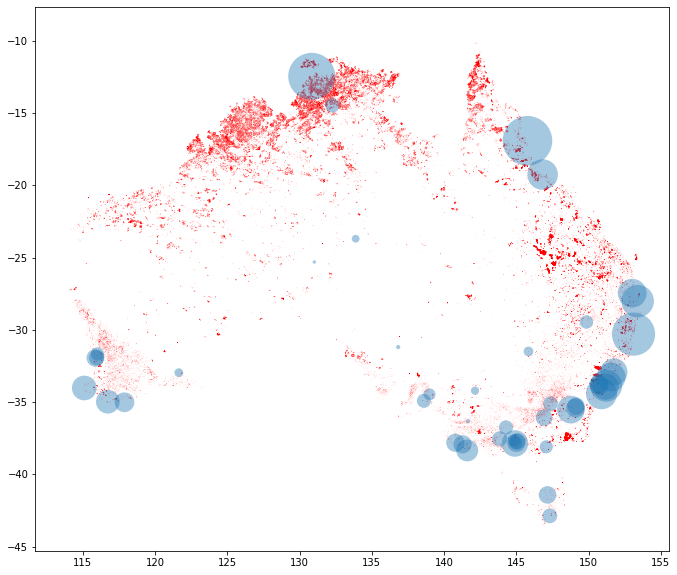

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import math
df3 = pd.read_csv('datasets/stationsCoordinates.csv')
plt.rcParams["figure.figsize"] = (20, 10)

X = df3['Longitude']
Y = df3['Latitude']
cities = df3["City"].tolist()
RainOccurence = np.zeros(len(cities))

for ind in df2.index:
    RainOccurence[cities.index(df2["Location"][ind])] += np.nan_to_num(df2["Rainfall"][ind])

figure, axes = plt.subplots()

axes.scatter(df1['longitude'],df1['latitude'],c="red",marker = 'o', s=0.00001)
axes.set_aspect(1)

for ind in range(len(cities)):
    draw_circle = plt.Circle((X[ind], Y[ind]),RainOccurence[ind]/10000,alpha=0.4)
    axes.add_artist(draw_circle)

plt.show()

In [ ]:
from math import radians, cos, sin, asin, sqrt

def distance(lat1, lat2, lon1, lon2):
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    

    r = 6371
      
    return(c * r)

def find_nearest_station(longitude,latitude):
    station = {'ville': 'unknwon','distance': 1000000000}
    for ind in range(len(cities)):
        d = distance(latitude,df3['Latitude'][ind],longitude,df3['Longitude'][ind])
        if(d < station['distance']):
            station["ville"] = cities[ind]
            station["distance"] = d

    return station['ville']




plt.scatter(df1['longitude'][10000],df1['latitude'][10000],c='red')

plt.scatter(df3['Longitude'],df3['Latitude'],c='blue')

station = df3.loc[df3['City'] == find_nearest_station(df1['longitude'][10000],df1['latitude'][10000])]
plt.scatter(station['Longitude'],station['Latitude'],c='green')
station = station.values.tolist()
rain = df2[(df2['Location'] == station[0][0])]
rain = rain[(rain['Date'] == df1['acq_date'][10000])]

fireExist = [0 for i in df2.index]



maxdistance = 500
for ind in df2.index:
    if(ind%1000 == 0 and ind != 0):
        print(ind)
    
    if('2013' not in df2['Date'][ind] and '2014' not in df2['Date'][ind]):
        continue
    station = df3.loc[df3['City'] == df2['Location'][ind]]
    station = station.values.tolist()
    for fire in df1[(df1['acq_date'] == df2['Date'][ind])].values:
        if(distance(fire[0],station[0][1],fire[1],station[0][2]) < maxdistance):
            fireExist[ind] = 1
            break
    

df2['fire'] = fireExist
print(fireExist)
df2.to_csv("newfiress.csv")

In [54]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler

df4 = pd.read_csv('datasets/newfiress.csv', header=0, usecols=["MinTemp", "MaxTemp", "Rainfall", "fire"])
df4 = df4.dropna(how='any',axis=0)

df4 = StandardScaler().fit_transform(df4)

pca_out = PCA().fit(df4)

print(pca_out.explained_variance_ratio_)


[0.43457156 0.25858598 0.2463377  0.06050476]


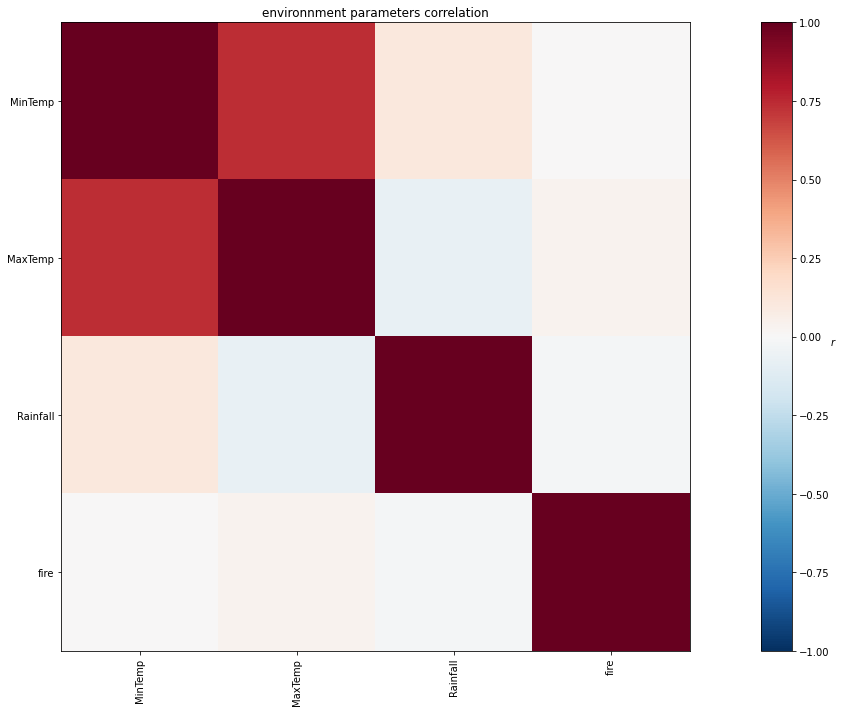

In [53]:
feature_names = ["MinTemp", "MaxTemp", "Rainfall", "fire"]

ax = plt.axes()

im = ax.imshow(np.corrcoef(df4.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(feature_names, rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(feature_names)

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("environnment parameters correlation")
plt.tight_layout()